In [3]:
import torch
import numpy as np

from torch import nn
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

print(dir(iris))
print(iris.DESCR)


['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ==========

In [3]:
print(iris.data)
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Text(0.5, 0, 'petal length (cm) (2)')

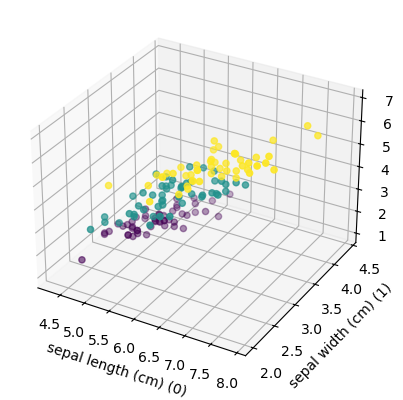

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
figiris = ax.scatter(iris.data[:,0], iris.data[:,1], iris.data[:,2], c=iris.target)
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[1]+' (1)')
ax.set_zlabel(iris.feature_names[2]+' (2)')



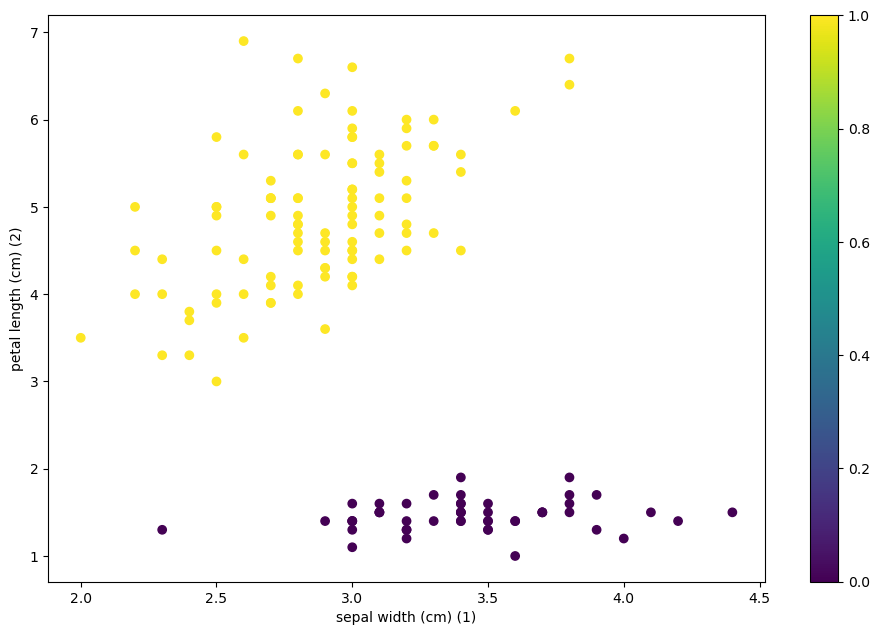

In [4]:
X = iris.data[:, [1,2]]
y = np.where(iris.target == 0, 1, -1)

X = torch.tensor(X, dtype= torch.float)
y = torch.tensor(y, dtype= torch.int).view(-1,1)


fig = plt.figure()
ax2 = plt.axes()
figiris = ax2.scatter(iris.data[:,1],iris.data[:,2],c=np.where(iris.target == 0, 0,1))
ax2.set_xlabel(iris.feature_names[1]+' (1)')
ax2.set_ylabel(iris.feature_names[2]+' (2)')

# this adjusts the space around the plot so we can read the z label
plt.gcf().subplots_adjust(left=-0.5,bottom=-0.3)

plt.colorbar(figiris)
ax.view_init(45,45)

In [5]:
class newNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.compute_unit = nn.Sequential(nn.Linear(2,1, bias =True))
    def forward(self, x):
        return self.compute_unit(x)

In [6]:
model = newNN()
print(model.compute_unit[0].weight)
print(model.compute_unit[0].bias)



Parameter containing:
tensor([[ 0.2612, -0.3262]], requires_grad=True)
Parameter containing:
tensor([0.0957], requires_grad=True)


In [7]:
ypred = model(X)

def perceptron_loss(y, ypred):
    L = torch.cat( (torch.zeros(y.shape),
            -torch.diagonal( ypred@y.T.to(torch.float) ).view(-1,1))
          , dim=1)
    loss, _ = torch.max(L, dim=1)
    return loss

In [8]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=1)

In [9]:
from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
        def __init__(self, data, labels):
            self.data = data.clone().detach()
            self.labels = labels.clone().detach()

        def __len__(self):
            return len(self.data)

        def __getitem__(self, idx):
            return self.data[idx], self.labels[idx]

data = MyDataset(X,y)

dataloader = DataLoader( data,
                         shuffle = False,
                         batch_size = 1)
                  

In [10]:
model.compute_unit[0].weight.data  = 0.01 * torch.ones(1,2)
model.compute_unit[0].bias.data = torch.zeros(1)

totalloss = 0
for inputs, labels in dataloader:            
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    print('==============================================')
    
    print('Output:', outputs.data, "Label:", labels.data)
    # Calculate the loss
    loss = perceptron_loss(labels, outputs )
    totalloss +=loss
    print('Loss:', loss.data)
    # Backward pass and optimization
    loss.backward()
    print('-------------------------------------')
    for param in model.parameters():
        print('Gradient: ', param.grad)
    print('-------------------------------------')
    optimizer.step()
    print('-------------------------------------')
    for param in model.parameters():
        print('Model param: ', param.data)
    print('-------------------------------------')


Output: tensor([[0.0490]]) Label: tensor([[1]], dtype=torch.int32)
Loss: tensor([0.])
-------------------------------------
Gradient:  tensor([[0., 0.]])
Gradient:  tensor([0.])
-------------------------------------
-------------------------------------
Model param:  tensor([[0.0100, 0.0100]])
Model param:  tensor([0.])
-------------------------------------
Output: tensor([[0.0440]]) Label: tensor([[1]], dtype=torch.int32)
Loss: tensor([0.])
-------------------------------------
Gradient:  tensor([[0., 0.]])
Gradient:  tensor([0.])
-------------------------------------
-------------------------------------
Model param:  tensor([[0.0100, 0.0100]])
Model param:  tensor([0.])
-------------------------------------
Output: tensor([[0.0450]]) Label: tensor([[1]], dtype=torch.int32)
Loss: tensor([0.])
-------------------------------------
Gradient:  tensor([[0., 0.]])
Gradient:  tensor([0.])
-------------------------------------
-------------------------------------
Model param:  tensor([[0.0

In [15]:
totalloss = 0
for inputs, labels in dataloader:            
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    print('==============================================')
    
    print('Output:', outputs.data, "Label:", labels.data)
    # Calculate the loss
    loss = perceptron_loss(labels, outputs )
    totalloss +=loss
    print('Loss:', loss.data)
    # Backward pass and optimization
    loss.backward()
    print('-------------------------------------')
    for param in model.parameters():
        print('Gradient: ', param.grad)
    print('-------------------------------------')
    optimizer.step()
    print('-------------------------------------')
    for name, param in model.named_parameters():
        print('Model '+name, param.data)
    print('-------------------------------------')

print(totalloss)

Output: tensor([[6.3690]]) Label: tensor([[1]], dtype=torch.int32)
Loss: tensor([0.])
-------------------------------------
Gradient:  tensor([[0., 0.]])
Gradient:  tensor([0.])
-------------------------------------
-------------------------------------
Model compute_unit.0.weight tensor([[ 3.6100, -5.1900]])
Model compute_unit.0.bias tensor([1.])
-------------------------------------
Output: tensor([[4.5640]]) Label: tensor([[1]], dtype=torch.int32)
Loss: tensor([0.])
-------------------------------------
Gradient:  tensor([[0., 0.]])
Gradient:  tensor([0.])
-------------------------------------
-------------------------------------
Model compute_unit.0.weight tensor([[ 3.6100, -5.1900]])
Model compute_unit.0.bias tensor([1.])
-------------------------------------
Output: tensor([[5.8050]]) Label: tensor([[1]], dtype=torch.int32)
Loss: tensor([0.])
-------------------------------------
Gradient:  tensor([[0., 0.]])
Gradient:  tensor([0.])
-------------------------------------
--------

[[ 3.61     -5.189999]]
[1.]


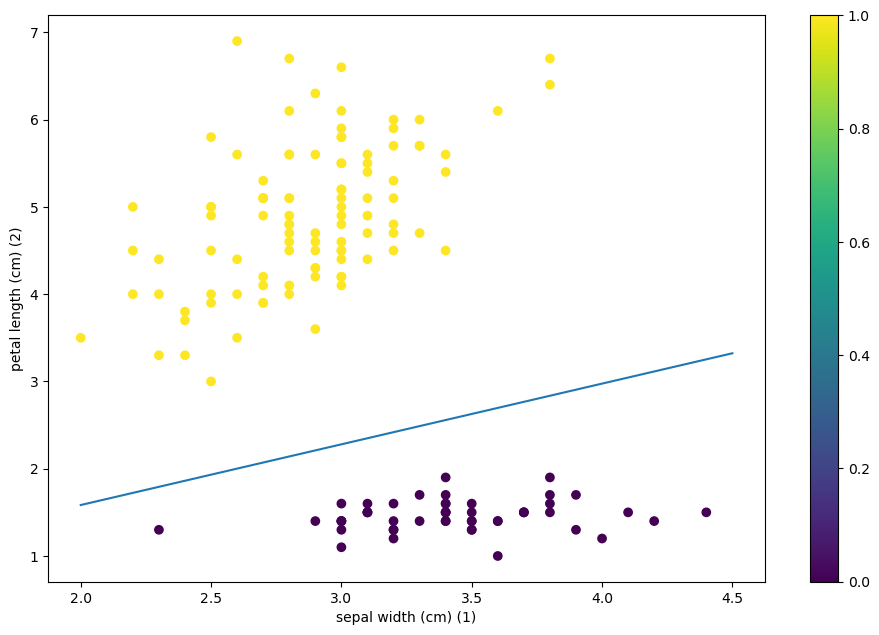

In [16]:
fig = plt.figure()
ax2 = plt.axes()
figiris = ax2.scatter(iris.data[:,1],iris.data[:,2],c=np.where(iris.target == 0, 0,1))
ax2.set_xlabel(iris.feature_names[1]+' (1)')
ax2.set_ylabel(iris.feature_names[2]+' (2)')

w = model.compute_unit[0].weight.data.numpy()
b = model.compute_unit[0].bias.data.numpy()
print(w)
print(b)
x = np.linspace(2,4.5,100)
plt.plot(x, -(b+w[0,0]*x)/w[0,1])
# this adjusts the space around the plot so we can read the z label
plt.gcf().subplots_adjust(left=-0.5,bottom=-0.3)

plt.colorbar(figiris)
ax.view_init(45,45)

Let us now look at a more interesting example: an autoencoder. This will also help us understand the singular value decomposition.



In [116]:
hidden_size = 10
input_size = 50
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        shared_weight = torch.randn(hidden_size, input_size)
        self.encoder = nn.Linear(input_size, hidden_size, bias =False)
        self.decoder = nn.Linear(hidden_size, input_size, bias = False)
        self.encoder.weight = nn.Parameter(shared_weight)
        self.decoder.weight = nn.Parameter(shared_weight.transpose(0,1))
    def forward(self, x):
        latent = self.encoder(x)
        output = self.decoder(latent)
        return output

In [146]:
X = np.random.normal(0,1,(1000,50))
import numpy.linalg as lin

# the following is to make X more skewed towards a low rank matrix, so the results
# are more instructive. 
u,l,v = lin.svd(X)
wt = [1.1**(-x) for x in range(len(l))]
l = l * wt
print(np.round(l,2))

X = u @ np.vstack((np.diag(l),np.zeros((950,50)))) @ v.T

# m is the number of coordinates of the input examples, 10 is the 
# number of latent coordinates we will use to reconstruct the data
m = 50
k = 10

[38.19 34.18 30.74 27.72 25.13 22.44 20.25 18.26 16.54 14.83 13.39 12.07
 10.95  9.83  8.9   8.02  7.23  6.55  5.9   5.36  4.79  4.35  3.92  3.53
  3.19  2.88  2.6   2.35  2.11  1.91  1.74  1.56  1.41  1.27  1.14  1.04
  0.93  0.84  0.76  0.68  0.61  0.55  0.49  0.45  0.4   0.36  0.32  0.29
  0.26  0.23]


In [148]:
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


model = autoencoder()

optimizer = optim.Adam(model.parameters())

class MyDataset(Dataset):
        def __init__(self, data):
            self.data = data.clone().detach()
            self.target = data.clone().detach()

        def __len__(self):
            return len(self.data)

        def __getitem__(self, idx):
            return self.data[idx], self.target[idx]



In [149]:
from torch.nn.functional import mse_loss as mse


def run_epoch(dataloader):
    totalloss = 0
    num_batches = 0
    for inputs, targets in dataloader:            
        # Zero the gradients
        optimizer.zero_grad()
        outputs = model(inputs)
    
          # Calculate the loss
        loss = mse(targets, outputs)
        totalloss += loss
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        num_batches +=1
    print('Average batch loss: ', totalloss/num_batches)


In [174]:
num_epochs = 100
data = MyDataset(torch.from_numpy(X).to(torch.float))

for num in range(num_epochs):

    dataloader = DataLoader( data,
                         shuffle = False,
                         batch_size = 64)
    run_epoch(dataloader)
    

Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad_fn=<DivBackward0>)
Average batch loss:  tensor(0.0238, grad

In [167]:
W = model.encoder.state_dict()['weight']

In [158]:
print(W.shape)

torch.Size([10, 50])


In [177]:
print(torch.round(W @ W.T))

tensor([[1., 0., -0., -0., 0., -0., 0., 0., 0., -0.],
        [0., 1., -0., -0., 0., -0., 0., 0., 0., -0.],
        [-0., -0., 1., 0., -0., 0., -0., -0., -0., 0.],
        [-0., -0., 0., 1., -0., 0., -0., -0., -0., 0.],
        [0., 0., -0., -0., 1., -0., 0., 0., 0., 0.],
        [-0., -0., 0., 0., -0., 1., -0., -0., -0., 0.],
        [0., 0., -0., -0., 0., -0., 1., 0., 0., 0.],
        [0., 0., -0., -0., 0., -0., 0., 1., 0., 0.],
        [0., 0., -0., -0., 0., -0., 0., 0., 1., -0.],
        [-0., -0., 0., 0., 0., 0., 0., 0., -0., 1.]])


In [176]:
# finally, we check how much power the columns of W carry on the top 10 eigen-vectors
# of X^TX, ie the best directions to represent the rows of X.
# The closer these numbers are to 1, the better the column space of W represents the 
# optimal linear space to project the rows of X into. Not all numbers need to be 
# close to 1, but at least some need to be.
W = model.encoder.state_dict()['weight']
V = v[:,:10]
Wn = W.clone().numpy().T

# This is the projection of W into smaller eigen-directions
pwr = lin.inv(V.T @ V) @ V.T @ Wn
print(np.diag(pwr.T @ pwr))


[0.95383135 0.88508    0.92386122 0.4291911  0.88666505 0.99961322
 0.9728477  0.96362703 0.98431569 0.99989358]
